In [16]:
from sympy import randprime, mod_inverse
import matplotlib.pyplot as plt
from statistics import mean
import random

plt.rcParams["figure.figsize"] = (20, 9)


In [17]:
def GenModulus(w):
    n = len(w) // 2
    p = randprime(2**n, 2 ** (n + 1))
    q = randprime(2**n, 2 ** (n + 1))
    N = p * q
    return N, p, q


In [18]:
def GenRSA(w):
    N, p, q = GenModulus(w)
    m = (p - 1) * (q - 1)
    e = 2**16 + 1
    d = mod_inverse(e, m)
    return N, e, d, p, q


In [19]:
def enc(m, N, e):
    return fast_pow(m, N, e)  # x ** e % N


def dec(c, N, d):
    return fast_pow(c, N, d)  # c ** d % N


In [20]:
def fast_pow(c, N, exp):
    exp_bin = "{0:b}".format(exp)
    # print(exp_bin)
    exp_len = len(exp_bin)
    reductions = 0
    h = 0
    x = c
    for j in range(1, exp_len):
        x, r = mod_reduce(x**2, N)
        reductions = reductions + r
        if exp_bin[j] == "1":
            x, r = mod_reduce(x * c, N)
            reductions = reductions + r
            h = h + 1
    return x, h, reductions


In [21]:
def mod_reduce(a, b):
    reductions = 0
    if a >= b:
        a = a % b
        reductions = 1
    return a, reductions


In [7]:
def gen_bool_range_with_exponents_in(N, c_range, smaller_exp, bigger_exp):
    c_less_then_bigger_bool = []
    c_between_bool = []
    for c in c_range:
        c_less_then_bigger_bool.append(c**bigger_exp < N)
        c_between_bool.append(c**smaller_exp < N < c**bigger_exp)
    return c_less_then_bigger_bool, c_between_bool

def gen_range_with_exponents_in(N, c_range, smaller_exp, bigger_exp):
    c_less_then_bigger = []
    c_between = []
    for c in c_range:
        if c**bigger_exp < N:
            c_less_then_bigger.append(c)
        if c**smaller_exp < N < c**bigger_exp:
            c_between.append(c)
    return c_less_then_bigger, c_between

In [22]:
w = "111111111111111111111111111111111111"
N, e, d, p, q = GenRSA(w)
print(f"{N=} {e=} {d=} {p=} {q=}")
print("{0:b}".format(d))
c_range = range(3, 400000)


N=153082215457 e=65537 d=131699504573 p=387151 q=395407
1111010101001111001101111010110111101


In [23]:
r_array = []
for c in c_range:
    decrypted = dec(c, N, d)
    # print(f"{c=}, {decrypted[2]}")
    r_array.append(decrypted[2])


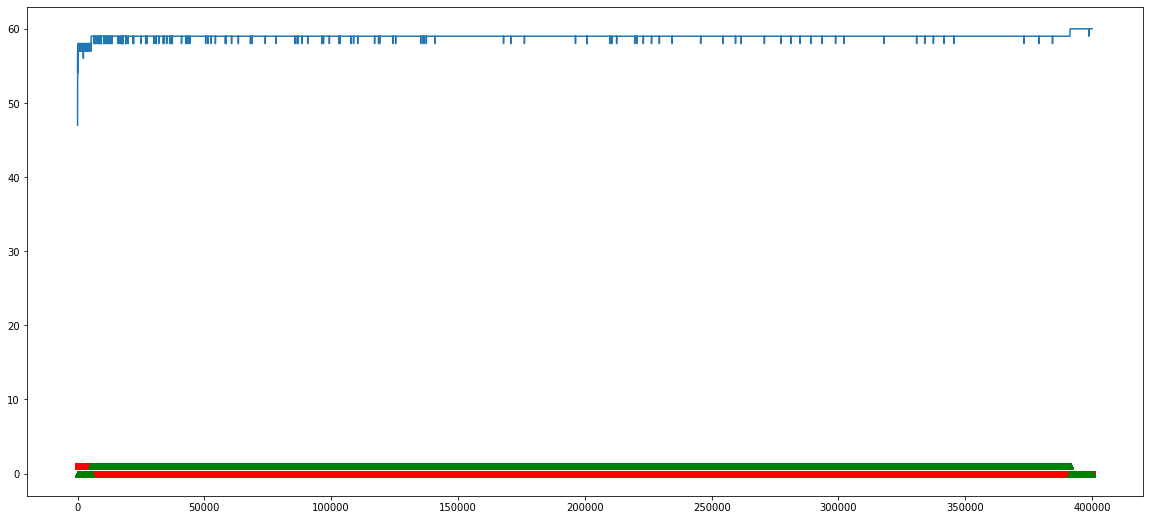

In [24]:
c_less_then_bigger_bool, c_between_bool = gen_bool_range_with_exponents_in(
    N=N, c_range=c_range, smaller_exp=2, bigger_exp=3
)
plt.plot(
    c_range,
    c_less_then_bigger_bool,
    "rs",
    c_range,
    c_between_bool,
    "g^",
    c_range,
    r_array
)


In [25]:
def ask_for_decryption(smaller_exp, bigger_exp, c_range):
    c_less_then_bigger, c_between = gen_range_with_exponents_in(
        N=N, c_range=c_range, smaller_exp=smaller_exp, bigger_exp=bigger_exp
    )

    c_less_then_bigger_array = []
    for c in c_less_then_bigger:
        decrypted = dec(c, N, d)
        c_less_then_bigger_array.append(decrypted[2])

    c_between_array = []
    for c in c_between:
        decrypted = dec(c, N, d)
        c_between_array.append(decrypted[2])

    print(c_less_then_bigger_array[:10], c_between_array[:10])
    print(f"{smaller_exp=}, {bigger_exp=}")
    print(mean(c_less_then_bigger_array), mean(c_between_array))

    e = 1
    if mean(c_less_then_bigger_array) + e < mean(c_between_array):
        return "1"
    else:
        return "0"


def timing_attack(d_length, c_range):
    guessed_d = ""
    for exp in range(d_length):
        bit = ask_for_decryption(
            smaller_exp=3 * exp + 2, bigger_exp=3 * exp + 3, c_range=c_range
        )
        print(bit)
        guessed_d += bit

    print(guessed_d)


In [26]:
n = len(w) // 2
print("{0:b}".format(d))
timing_attack(d_length=n, c_range=c_range)


1111010101001111001101111010110111101
[47, 50, 52, 53, 53, 50, 55, 51, 55, 53] [59, 59, 59, 59, 58, 59, 59, 59, 59, 59]
smaller_exp=2, bigger_exp=3
57.944080792968016 58.99968904505737
1
[47, 50, 52, 53, 53, 50, 55, 51, 55, 53] [58, 57, 58, 57, 57, 58, 58, 58, 58, 57]
smaller_exp=5, bigger_exp=6
55.29577464788732 57.77777777777778
1
[47, 50, 52, 53, 53, 50, 55, 51, 55, 53] [54, 56, 55, 56, 56, 55, 55, 56]
smaller_exp=8, bigger_exp=9
52.93333333333333 55.375
1
[47, 50, 52, 53, 53, 50] [55, 51]
smaller_exp=11, bigger_exp=12
50.833333333333336 53
1
[47, 50, 52] [53]
smaller_exp=14, bigger_exp=15
49.666666666666664 53
1
[47, 50] []
smaller_exp=17, bigger_exp=18


StatisticsError: mean requires at least one data point

In [27]:
def my_fast_pow(c, N, exp_bin):
    exp_len = len(exp_bin)
    reductions_list = [-1 for _ in range(2 * exp_len)]
    x = c
    for j in range(1, exp_len):
        x, r = mod_reduce(x**2, N)
        reductions_list[2*j] = r
        # print(f'{exp_bin[j]=}')
        if exp_bin[j] == "1":
            x, r = mod_reduce(x * c, N)
            reductions_list[2*j + 1] = r
    return reductions_list

def find_lists_differ_last_bit(d):
    pairs = []
    for key, value in d.items():
        for key_2, value_2 in d.items():
            # print(f'{value[:-1]=} {value_2[:-1]=} {value[-1]=} {value_2[-1]=}')
            if value[:-1] == value_2[:-1]:
                # print(value[-1], value_2[-1])
                    # and value[-1] != value_2[-1]:
                pairs.append([key, value, key_2, value_2])
    return pairs

def find_message_with_given_prefix(match, N, exp_bin):
    while True:
        c = random.choice(c_range)
        reductions = my_fast_pow(c, N, exp_bin)
        if reductions[:-1] == match[:-1]:
            print(reductions, match)


In [28]:
tries_number = 200000
mes_red = {}
y_tries, x_tries = [], []
exp_bin = "1111"
i = 0
while i < tries_number:
    i += 1
    c = random.choice(c_range)
    reductions = my_fast_pow(c, N, exp_bin)
    mes_red[c] = reductions
    if reductions[-1] == 0:
        print(reductions)
        # print(reductions[:-1])

# pairs = find_lists_differ_last_bit(mes_red)
# print(mes_red)
# print(pairs)


[-1, -1, 0, 0, 1, 1, 1, 0]
[-1, -1, 0, 1, 1, 1, 1, 0]
[-1, -1, 0, 0, 1, 1, 1, 0]


In [72]:
find_message_with_given_prefix([-1, -1, 0, 1, 1, 1, 1, 0], N, exp_bin)
